In [1]:
from scipy.linalg import solve
from scipy.special import erf
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
# import sklearn
import scipy.io
%matplotlib inline

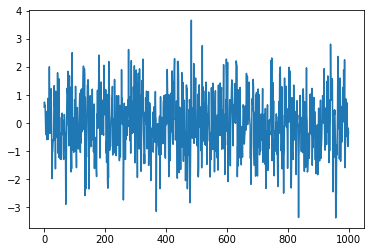

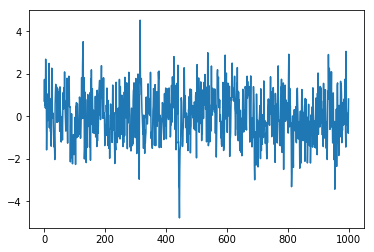

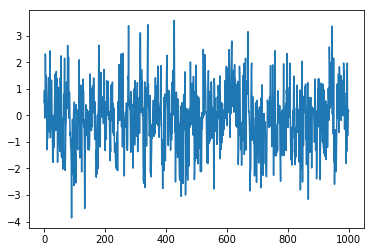

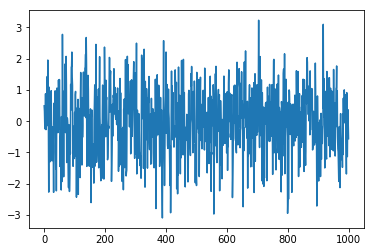

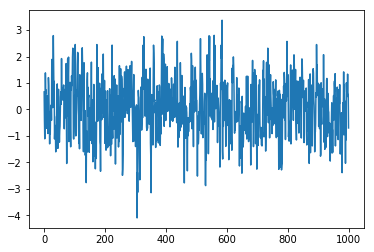

In [2]:
num_of_var = 5
time_points = 1000

m = np.random.rand(num_of_var, num_of_var)-0.5
m = 0.5*m.dot(m.T) - np.eye(num_of_var)
x = np.zeros((num_of_var, time_points))
x[:,0] = np.random.rand(1, num_of_var)
std = 1
for i in range(1, time_points):
    x[:, i] = x[:,i-1] + std**2*x[:,i-1].dot(m) + std*np.random.normal(size=num_of_var) 
    
for i in range((x.shape[0])):
    plt.plot(x[i])
    plt.show()

In [3]:
train_frac = 0.8
n_seconds = x.shape[1] #-1 to account for when t=n
t = np.arange(n_seconds)
split = int(n_seconds * train_frac)
t_train, t_test = t[:split], t[split:]
l = float(len(t_train)-1)
t_train1, t_train2 = t_train[:-1], t_train[1:]
t_test1, t_test2 = t_test[:-1], t_test[1:]

In [4]:
def fit(i, x, iters=50, atol=1e-16):
    y = x[i,1:]-x[i,:-1]

    x_train = x[:, t_train]
    x_train1, x_test1 = x[:,t_train1], x[:,t_test1]

    s = np.sign((y[t_train1]))
    c = np.cov(x_train)

#     x0 = (x_train1 - x_train.mean(1)[:, np.newaxis]) / l
    x0 = x_train1/l

#     w = np.zeros(x.shape[0]) #272 channels
#     w[0] = 1
    w = np.random.rand(x.shape[0])-0.5

    erf_last = np.inf
    e = []
#     d = []

    for it in range(iters):
        h = w.dot(x_train1)
        
        sig = 1#np.std(y[t_train1] - w.dot(x[:, t_train1]))
#         print(sig)
        erf_next = erf(h/(np.sqrt(2)))

#         d.append(np.linalg.norm(y[t_train2]-h/np.sqrt(2))**2)
        ei = np.linalg.norm(erf_next - erf_last) 
        e.append(ei)
        if ei * ei < atol:
            print(it)
            break
        erf_last = erf_next.copy()
    
        h *= s / erf_next
        w = solve(c, x0.dot(h))
    return w, e

In [5]:
res = [fit(i,x) for i in range(x.shape[0])]
w = np.vstack([r[0] for r in res])
e = [r[1] for r in res]

27
22
25
21
19


0.9869224500143586


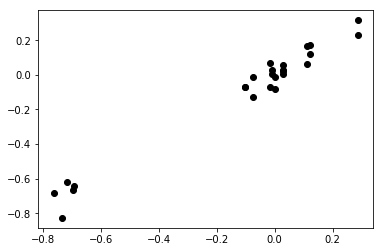

In [6]:
x_values = [];
y_values = [];
for i in range(m.shape[0]):
    for j in m[i]:
        x_values.append(j)
    for k in w[i]:
        y_values.append(k)
plt.plot(m, w.T,'ko')

import plotly
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(r_value)

In [7]:
temp = x.shape[0]
train_prediction = np.empty((temp, len(t_train2)))
test_prediction = np.empty((temp, len(t_test2)))
arr = []

for i in range(temp):
    y = x[i,1:]-x[i,:-1]
    train_prediction[i] = w[i].dot(x[:,t_train1]) + np.mean(y[t_train1] - w[i].dot(x[:,t_train1]))
    test_prediction[i] = w[i].dot(x[:,t_test1]) + np.mean(y[t_train1] - w[i].dot(x[:,t_train1]))
    arr.append(np.mean(y[t_train1] - w[i].dot(x[:,t_train1])))

#     train_prediction[i][train_prediction[i] < 0] = 0
#     test_prediction[i][test_prediction[i] < 0] = 0
#     train_prediction[i][train_prediction[i] > 1] = 1
#     test_prediction[i][test_prediction[i] > 1] = 1

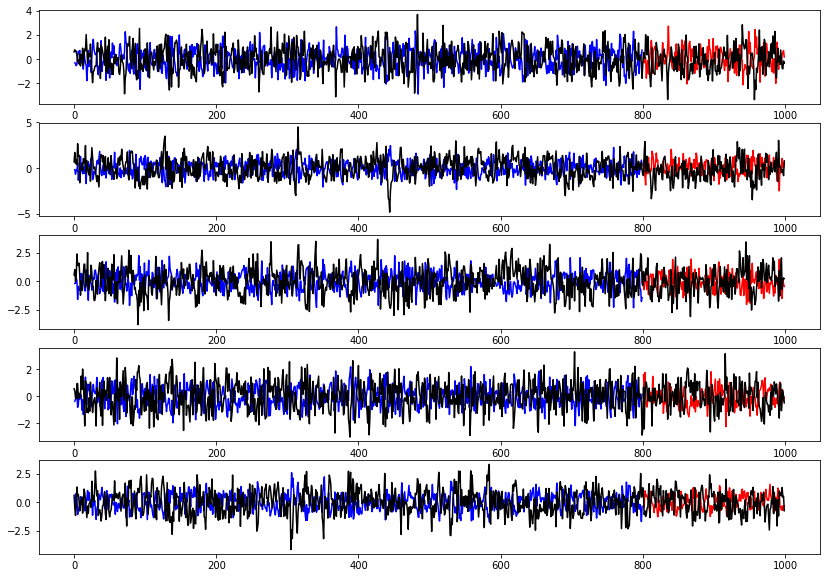

In [8]:
fig, ax = plt.subplots(x.shape[0], 1, figsize=(14, 2*x.shape[0]))
for i in range (x.shape[0]):
    ax[i].plot(t_train2, train_prediction[i], 'b-',
               t_test2, test_prediction[i], 'r-',
               t, x[i]-np.mean(x[i]), 'k-', clip_on=False)
plt.show()